In [202]:
%run DataAnalysis.ipynb
alldata = DataAnalysis(auto=True)

In [468]:
#from __future__ import print_function
import numpy as np

def LinePlaneCollision(planeNormal, planePoint, rayDirection, rayPoint, epsilon=1e-6):

    ndotu = planeNormal.dot(rayDirection)
    if abs(ndotu) < epsilon:
        return None

    t = -planeNormal.dot(rayPoint - planePoint) / ndotu
    
    return rayPoint + t * rayDirection


def LineCubeCollision(cubeCenter, cubeLength, rayDirection, rayPoint, epsilon=1e-6):
    
    cubeCollisions = []
    
    
    halfLength = cubeLength / 2.0
    
    directions = np.array([
        [0,0,halfLength], #up
        [0,halfLength,0], #front
        [halfLength,0,0], #right
    ])

    planeCollisions = []
    for i in range(6):
        if i >= 3:
            faceNormal = -directions[i%3] # to get down, back, left
        else:
            faceNormal = directions[i]
            
        facePoint = cubeCenter + faceNormal
        
        collision = LinePlaneCollision(faceNormal, facePoint, rayDirection, rayPoint)
        if collision is not None:
            planeCollisions.append(collision)
        
    #check if intersection is outside cube
    for collision in planeCollisions:
        
        inside = True
        for i in range(3):
            if collision[i] > (cubeCenter[i] + halfLength + epsilon) or collision[i] < (cubeCenter[i] - halfLength - epsilon):
                inside = False
                
        if inside:
            cubeCollisions.append(collision)
    
    return cubeCollisions

#Define plane
#planeNormal = np.array([0, 0, 2.5])
#planePoint = np.array([0, 0, 5]) #Any point on the plane

#Define ray
rayDirection = np.array([-307.55762909,69.6841733,-735.22270148])
rayPoint = np.array([189.11881455,32.77791335,414.01135074]) #Any point along the ray

#Psi = LinePlaneCollision(planeNormal, planePoint, rayDirection, rayPoint)
#print ("intersection at", Psi)


#cubeCenter = np.array([117.3, 44.1, 174.0])
#cubeLength = 50
#print(LineCubeCollision(cubeCenter, cubeLength, rayDirection, rayPoint))

In [469]:
# create dictionary mapping channel numbers to a tuple containing coordinates (x,y,z)
def load_coords():

    coords = {}

    with open("./data/detector_positions.txt", 'r') as f:
        for line in f:
            data = line.split(',')

            if int(data[0]) < 1000:
                coords[int(data[0])] = (float(data[1]), float(data[2]), float(data[3]))

    return coords

coords = load_coords()

In [470]:
coords[374]

(117.3, 44.1, 174.0)

In [480]:
cluster = 2
linepoints = alldata.get_fitline(alldata.get_cluster(cluster))

#linepoints = np.array([[ 224.50962498, -348.74539971,   39.34735824],
#       [-177.58962498,   13.58539971, -549.74735824]])
rayDirection = linepoints[1] - linepoints[0]
rayPoint = linepoints[0]

cubeLength = 50
    
hit_channels = []
for channel in range(1,len(coords)+1):
    cubeCenter = coords[channel]

    
    collision = LineCubeCollision(cubeCenter, cubeLength, rayDirection, rayPoint)
    if len(collision) == 2:
        print(collision)
        hit_channels.append(channel)

hit_channels


[array([-106.68510267,  199.69352137,  257.        ]), array([-98.98475006, 166.1       , 221.52399587])]
[array([-110.44581799,  216.1       ,  274.32584974]), array([-108.42156714,  207.26901296,  265.        ])]
[array([-119.27447011,  254.61583541,  315.        ]), array([-112.46296595,  224.9       ,  283.61897603])]
[array([-123.92403388,  274.9       ,  336.42082989]), array([-121.01093459,  262.191327  ,  323.        ])]
[array([-48.44144046, -54.4       , -11.33217969]), array([-54.7       , -27.09643818,  17.50139394])]
[array([   4.88273988, -287.03181338, -257.        ]), array([   4.7       , -286.23459326, -256.158106  ])]
[array([  -5.97016309, -239.68499093, -207.        ]), array([  -4.7       , -245.22619835, -212.85172049])]
[array([   7.48857106, -298.4       , -269.00522658]), array([  17.47210732, -341.95412741, -315.        ])]
[array([ -31.14889799, -129.84036286,  -91.        ]), array([ -28.22411662, -142.6       , -104.47464992])]
[array([-39.68518456, -92.6 

[76, 77, 90, 91, 215, 575, 588, 613, 798, 799, 810, 811]

In [481]:
hit_channel_coords = np.array([coords[channel] for channel in hit_channels])

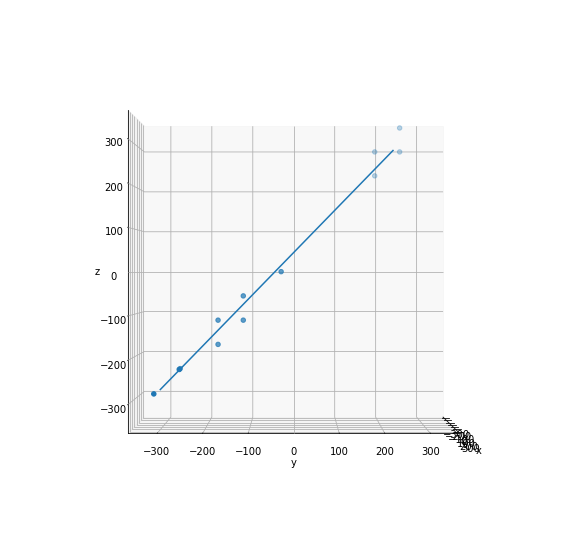

In [482]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
#ax.set_proj_type('ortho')

ax.scatter3D(*hit_channel_coords.T)
ax.plot3D(*linepoints.T)

plt.xlim([-350,350])
plt.ylim([-350,350])
ax.set_zlim([-350,350])

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

ax.view_init(0, 0)

plt.show()

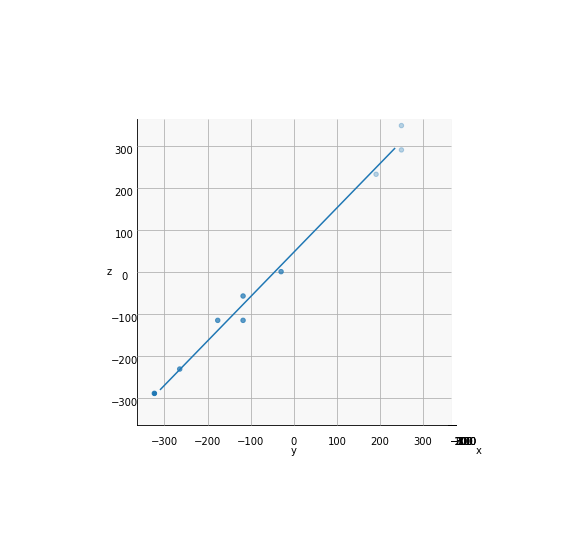

In [483]:
alldata.show_cluster(cluster, 0, 0)

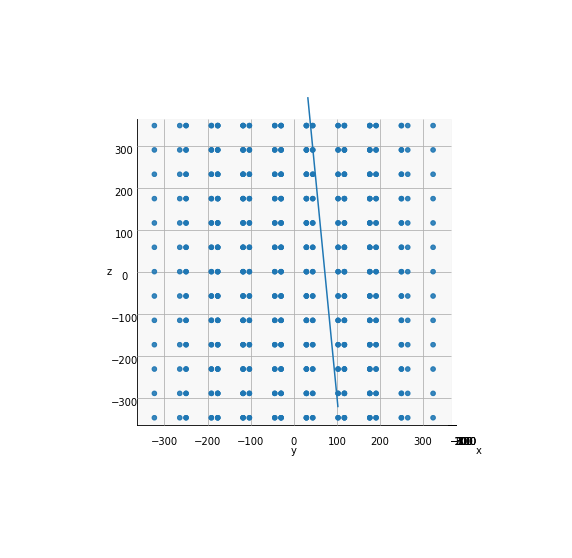

In [369]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.set_proj_type('ortho')

ax.scatter3D(*np.array(list(coords.values())).T)
ax.plot3D(*linepoints.T)

plt.xlim([-350,350])
plt.ylim([-350,350])
ax.set_zlim([-350,350])

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

ax.view_init(0, 0)

plt.show()